In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import collections
import witwidget
import os, glob


from matplotlib import pyplot
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
#plots
import seaborn as sns

from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
 
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

In [2]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(filenames.index(file), ' ',os.path.basename(file))

0   3C-EURUSD_FULL_1D_145F.csv
1   3C-EURUSD_FULL_1D_145F_0.0017Sep.csv
2   3C-EURUSD_FULL_1D_145F_0.0018Sep.csv
3   3C-EURUSD_FULL_1D_145F_0.0019Sep.csv
4   3C-EURUSD_FULL_1D_145F_0.0025Sep.csv
5   3C-EURUSD_FULL_1D_145F_0.0028Sep.csv
6   3C-EURUSD_FULL_1D_145F_0.0029Sep.csv
7   3C-EURUSD_FULL_1D_145F_0.002Sep.csv
8   3C-EURUSD_FULL_1D_145F_0.0032Sep.csv
9   3C-EURUSD_FULL_1D_145F_0.0035Sep.csv
10   3C-EURUSD_FULL_1D_145F_0.003Sep.csv
11   3C-EURUSD_FULL_1D_21F.csv
12   3C-EURUSD_FULL_1D_45F.csv
13   3C-EURUSD_FULL_1D_45F_0.0029Sep.csv
14   3C-EURUSD_FULL_1D_70F.csv
15   3C-EURUSD_FULL_1D_70F_0.0029Sep.csv
16   3C-EURUSD_FULL_1H_45F.csv
17   3C-EURUSD_FULL_4H_145F_0.002Sep.csv
18   5C-EURUSD_FULL_1D_21F.csv
19   5C-EURUSD_FULL_1D_27F.csv
20   5C-EURUSD_FULL_1D_45F.csv
21   5C-EURUSD_FULL_1D_70F.csv
22   C-EURUSD_FULL_1D_21F.csv
23   C-EURUSD_FULL_1H_25F.csv
24   C-EURUSD_FULL_1H_45F.csv
25   C-EURUSD_FULL_1H_54F.csv


In [3]:
#SELECT an INDEX 
INDX = 17

MODEL_TYPE = 'XGBOOST'
TARGET_NAME = "Class"
ID = '01'

PROFUNDIDAD = 9

TEST_SIZE = .2
VAL_SIZE = .2

In [4]:
# Set column dtypes for Pandas
from datetime import datetime
dt = datetime.utcnow()
COLUMN_NAMES = collections.OrderedDict({
  'Gmt time': object,
  'Open': np.float64,
  'High': np.float64,
  'Low': np.float64,
  'Close': np.float64,
  'Volume': np.float64,
  'Open_Bid': np.float64,
  'High_Bid': np.float64,
  'Low_Bid': np.float64,
  'Close_Bid': np.float64,
  'Volume_Bid': np.float64,
  'Spread': np.float64,
  'day_name': object,
  'weekday': 'category',#'category'np.int64
  'Pct_Range_Close': np.float64,
  'Pct_Range_Close_diff': np.float64,
  'MA_Close_5': np.float64,
  'MA_Close_25': np.float64,
  'MA_Close_50': np.float64,
  'MA_Close_200': np.float64,
  'EMA_Close_5': np.float64,
  'Momentum_1': np.float64,
  'Momentum_2': np.float64,
  'Momentum_5': np.float64,
  'Momentum_24': np.float64,
  'rsi': np.float64,
  'Rolling_Mean25': np.float64,
  'Bollinger_High': np.float64,
  'Bollinger_Low': np.float64,
  'PP': np.float64,
  'R1': np.float64,
  'S1': np.float64,
  'R2': np.float64,
  'S2': np.float64,
  'R3': np.float64,
  'S3': np.float64,
  'SO%k': np.float64,
  'SO%k1': np.float64,
  'SO%d2': np.float64,
  'Trix_5': np.float64,
  'MACD_5_25': np.float64,
  'MACDsign_5_25': np.float64,
  'MACDdiff_5_25': np.float64,
  'Mass_Index_25_8_9': np.float64,
  'Class': np.float64
})

In [5]:
base =  os.path.basename(filenames[INDX])
print(base)
FILE_NAME_BASE = os.path.splitext(base)[0]
print(FILE_NAME_BASE)

3C-EURUSD_FULL_4H_145F_0.002Sep.csv
3C-EURUSD_FULL_4H_145F_0.002Sep


In [6]:
# Load data into Pandas
data = pd.read_csv(filenames[INDX], 
  index_col=False,
  dtype=COLUMN_NAMES
)

data = data.dropna()

#data = shuffle(data, random_state=2)
data.head()

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,Class
0,2004-01-01 00:00:00,1.25950,1.25965,1.25826,1.25869,19408.8998,1.25934,1.25953,1.25814,1.25854,...,30.935252,30.935252,-69.064748,0.0,1.258690,0.0,-0.422734,0.000000,0.000000,0.0
1,2004-01-01 04:00:00,1.25908,1.25960,1.24698,1.25910,41634.6001,1.25898,1.25948,1.24679,1.25900,...,95.659037,63.297144,-4.340963,0.0,1.258882,0.0,0.032574,0.032568,0.032574,0.0
2,2004-01-01 08:00:00,1.25900,1.25953,1.25723,1.25785,23757.6001,1.25884,1.25938,1.25709,1.25775,...,85.793212,70.795834,-14.206788,0.0,1.258416,0.0,-0.099277,-0.099327,-0.066736,0.0
3,2004-01-01 12:00:00,1.25785,1.26052,1.25727,1.25911,25753.3003,1.25775,1.26035,1.25710,1.25897,...,89.586411,90.346220,-10.413589,0.0,1.258725,0.0,0.100171,0.100121,0.033368,-1.0
4,2004-01-01 16:00:00,1.25905,1.25968,1.25371,1.25461,234854.4999,1.25890,1.25958,1.25357,1.25451,...,56.351551,77.243725,-43.648449,0.0,1.257113,0.0,-0.357395,-0.358035,-0.324147,1.0


In [7]:
data.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid',
       ...
       'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr', 'momentum_ao',
       'momentum_kama', 'momentum_roc', 'others_dr', 'others_dlr', 'others_cr',
       'Class'],
      dtype='object', length=145)

In [8]:
data = data.drop(['Gmt time'], axis = 1)
data = data.drop(['day_name'], axis = 1)
data = data.drop(['weekday'], axis = 1)
data = data.drop(['Open_Bid'], axis = 1)
data = data.drop(['High_Bid'], axis = 1)
data = data.drop(['Low_Bid'], axis = 1)
data = data.drop(['Close_Bid'], axis = 1)



#data = data.drop(['EMA_Close_5'], axis = 1)

data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,Class
0,1.25950,1.25965,1.25826,1.25869,19408.8998,23473.5999,0.00015,0.000000,0.000000,19408.8998,...,30.935252,30.935252,-69.064748,0.0,1.258690,0.0,-0.422734,0.000000,0.000000,0.0
1,1.25908,1.25960,1.24698,1.25910,41634.6001,48684.6006,0.00010,0.000326,0.000326,61043.4999,...,95.659037,63.297144,-4.340963,0.0,1.258882,0.0,0.032574,0.032568,0.032574,0.0
2,1.25900,1.25953,1.25723,1.25785,23757.6001,27086.9995,0.00010,-0.000993,-0.001319,84801.1000,...,85.793212,70.795834,-14.206788,0.0,1.258416,0.0,-0.099277,-0.099327,-0.066736,0.0
3,1.25785,1.26052,1.25727,1.25911,25753.3003,32530.2993,0.00014,0.001002,0.001994,110554.4003,...,89.586411,90.346220,-10.413589,0.0,1.258725,0.0,0.100171,0.100121,0.033368,-1.0
4,1.25905,1.25968,1.25371,1.25461,234854.4999,288977.2969,0.00010,-0.003574,-0.004576,345408.9002,...,56.351551,77.243725,-43.648449,0.0,1.257113,0.0,-0.357395,-0.358035,-0.324147,1.0


In [9]:
SIZE = data.shape[0]
NUM_FEATURES = data.shape[1]
print(SIZE)
print(NUM_FEATURES)

26494
138


In [10]:
# Label preprocessing
labels = data['Class'].values

# See the distribution of approved / denied classes (0: denied, 1: approved)
print(data['Class'].value_counts())

 0.0    19783
-1.0     3383
 1.0     3328
Name: Class, dtype: int64


In [11]:
data = data.drop(columns=['Class'])

In [827]:
def get_2Dimension(df, RANGE):
    new_df = pd.DataFrame()
    for i in range(RANGE):
#        new_df = df
        for j in range (df.shape[1]):
            #value = df.iloc[i+1,j]
            #print(value)
            new_col_name = df.columns[j] + '_' + str(i+1)
            #print(new_col_name)
            new_df[new_col_name] = df.iloc[i+1:,j]
            #print(new_df[new_col_name].isnull().sum())
            new_df.fillna(method='backfill', inplace=True)
            #print(new_df[new_col_name].isnull().sum())
    print(new_df.columns)
    return new_df

 


In [828]:
data

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,1.25950,1.25965,1.25826,1.25869,19408.8998,23473.5999,0.00015,0.000000,0.000000,1.940890e+04,...,0.000000,30.935252,30.935252,-69.064748,0.000000,1.258690,0.000000,-0.422734,0.000000,0.000000
1,1.25908,1.25960,1.24698,1.25910,41634.6001,48684.6006,0.00010,0.000326,0.000326,6.104350e+04,...,86.509636,95.659037,63.297144,-4.340963,0.000000,1.258882,0.000000,0.032574,0.032568,0.032574
2,1.25900,1.25953,1.25723,1.25785,23757.6001,27086.9995,0.00010,-0.000993,-0.001319,8.480110e+04,...,78.111588,85.793212,70.795834,-14.206788,0.000000,1.258416,0.000000,-0.099277,-0.099327,-0.066736
3,1.25785,1.26052,1.25727,1.25911,25753.3003,32530.2993,0.00014,0.001002,0.001994,1.105544e+05,...,74.539877,89.586411,90.346220,-10.413589,0.000000,1.258725,0.000000,0.100171,0.100121,0.033368
4,1.25905,1.25968,1.25371,1.25461,234854.4999,288977.2969,0.00010,-0.003574,-0.004576,3.454089e+05,...,60.634548,56.351551,77.243725,-43.648449,0.000000,1.257113,0.000000,-0.357395,-0.358035,-0.324147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26489,1.11051,1.11420,1.10962,1.11354,74257.9698,64556.8799,0.00002,0.002701,0.001304,2.122996e+09,...,70.534370,96.823869,96.552777,-3.176131,0.012410,1.107160,1.068281,0.270139,0.269775,-11.531831
26490,1.11355,1.11452,1.10944,1.11070,113196.9590,195899.7617,0.00003,-0.002550,-0.005252,2.123110e+09,...,64.216867,81.895735,91.312170,-18.104265,0.012677,1.107672,1.265477,-0.255042,-0.255368,-11.757462
26491,1.11069,1.11112,1.10811,1.10998,54751.2294,53543.9307,0.00001,-0.000648,0.001902,2.123164e+09,...,56.909494,76.067475,84.929026,-23.932525,0.012556,1.107986,0.930211,-0.064824,-0.064845,-11.814664
26492,1.10997,1.11094,1.10982,1.11071,4646.7427,4041.1875,0.00035,0.000658,0.001306,2.123169e+09,...,62.729783,78.559370,78.840860,-21.440630,0.012424,1.108467,0.818742,0.065767,0.065745,-11.756668


In [829]:
pd_old_rows = get_2Dimension(data,PROFUNDIDAD)

Index(['Open_1', 'High_1', 'Low_1', 'Close_1', 'Volume_1', 'Volume_Bid_1',
       'Spread_1', 'Pct_Range_Close_1', 'Pct_Range_Close_diff_1', 'AQV_1',
       ...
       'momentum_uo_9', 'momentum_stoch_9', 'momentum_stoch_signal_9',
       'momentum_wr_9', 'momentum_ao_9', 'momentum_kama_9', 'momentum_roc_9',
       'others_dr_9', 'others_dlr_9', 'others_cr_9'],
      dtype='object', length=1233)


In [830]:
pd_old_rows.shape

(26493, 1233)

In [831]:
data = pd.concat([data, pd_old_rows], axis=1, sort=False)
data.fillna(method='backfill', inplace=True)
data.shape

(26494, 1370)

In [832]:
data.head(30)

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo_9,momentum_stoch_9,momentum_stoch_signal_9,momentum_wr_9,momentum_ao_9,momentum_kama_9,momentum_roc_9,others_dr_9,others_dlr_9,others_cr_9
0,1.25950,1.25965,1.25826,1.25869,19408.8998,23473.5999,0.00015,0.000000,0.000000,1.940890e+04,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273
1,1.25908,1.25960,1.24698,1.25910,41634.6001,48684.6006,0.00010,0.000326,0.000326,6.104350e+04,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273
2,1.25900,1.25953,1.25723,1.25785,23757.6001,27086.9995,0.00010,-0.000993,-0.001319,8.480110e+04,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273
3,1.25785,1.26052,1.25727,1.25911,25753.3003,32530.2993,0.00014,0.001002,0.001994,1.105544e+05,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273
4,1.25905,1.25968,1.25371,1.25461,234854.4999,288977.2969,0.00010,-0.003574,-0.004576,3.454089e+05,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273
5,1.25475,1.25923,1.25289,1.25733,116772.7988,139036.8028,0.00010,0.002168,0.005742,4.621817e+05,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273
6,1.25717,1.25936,1.25214,1.25630,108415.1016,125805.6016,0.00020,-0.000819,-0.002987,5.705968e+05,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273
7,1.25615,1.25765,1.25506,1.25733,105642.8008,124937.8984,0.00010,0.000820,0.001639,6.762396e+05,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273
8,1.25753,1.26282,1.25741,1.26003,104212.2012,122896.0000,0.00014,0.002147,0.001328,7.804518e+05,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273
9,1.25990,1.26165,1.25624,1.25846,106541.4004,129628.0000,0.00010,-0.001246,-0.003393,8.869932e+05,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.000000,-0.124600,-0.124678,-0.018273


In [833]:
# Convert categorical columns to dummy columns
dummy_columns = list(data.dtypes[data.dtypes == 'category'].index)
data = pd.get_dummies(data, columns=dummy_columns)

In [834]:
# Preview the data
data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo_9,momentum_stoch_9,momentum_stoch_signal_9,momentum_wr_9,momentum_ao_9,momentum_kama_9,momentum_roc_9,others_dr_9,others_dlr_9,others_cr_9
0,1.25950,1.25965,1.25826,1.25869,19408.8998,23473.5999,0.00015,0.000000,0.000000,19408.8998,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.0,-0.1246,-0.124678,-0.018273
1,1.25908,1.25960,1.24698,1.25910,41634.6001,48684.6006,0.00010,0.000326,0.000326,61043.4999,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.0,-0.1246,-0.124678,-0.018273
2,1.25900,1.25953,1.25723,1.25785,23757.6001,27086.9995,0.00010,-0.000993,-0.001319,84801.1000,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.0,-0.1246,-0.124678,-0.018273
3,1.25785,1.26052,1.25727,1.25911,25753.3003,32530.2993,0.00014,0.001002,0.001994,110554.4003,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.0,-0.1246,-0.124678,-0.018273
4,1.25905,1.25968,1.25371,1.25461,234854.4999,288977.2969,0.00010,-0.003574,-0.004576,345408.9002,...,54.681438,72.474747,77.100429,-27.525253,0.000101,1.258286,0.0,-0.1246,-0.124678,-0.018273


In [835]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Volume_Bid', 'Spread',
       'Pct_Range_Close', 'Pct_Range_Close_diff', 'AQV',
       ...
       'momentum_uo_9', 'momentum_stoch_9', 'momentum_stoch_signal_9',
       'momentum_wr_9', 'momentum_ao_9', 'momentum_kama_9', 'momentum_roc_9',
       'others_dr_9', 'others_dlr_9', 'others_cr_9'],
      dtype='object', length=1370)

### SPLIT in 3 Sub Datasets

In [836]:

total = data.shape[0]
print('Total: ', total)

s1 = TEST_SIZE + VAL_SIZE
print('Sum of %s:',s1)
f1 = int(total * s1)
print('count of Val and Test:',f1)
end_train = total - f1
print('end of train: ', end_train)

count_val= int(total * VAL_SIZE)
print('count val: ',count_val)

count_test= int(total * TEST_SIZE)
print('count test: ',count_test)

end_val = end_train + count_val
print('end_val', end_val)


Total:  26494
Sum of %s: 0.4
count of Val and Test: 10597
end of train:  15897
count val:  5298
count test:  5298
end_val 21195


In [837]:
data_training = data.iloc[:end_train]
data_val = data.iloc[end_train: end_val]
data_test = data.iloc[end_val:]

print("data_training.shape: ",data_training.shape)
print("data_val.shape: ", data_val.shape)
print("data_test.shape: ", data_test.shape)

data_training_y = labels[:end_train]
data_val_y = labels[end_train: end_val]
data_test_y = labels[end_val:]

print("data_training_y.shape: ", data_training_y.shape)
print("data_val_y.shape: ", data_val_y.shape)
print("data_test_y.shape: ", data_test_y.shape)

data_training.shape:  (15897, 1370)
data_val.shape:  (5298, 1370)
data_test.shape:  (5299, 1370)
data_training_y.shape:  (15897,)
data_val_y.shape:  (5298,)
data_test_y.shape:  (5299,)


In [838]:
x_train = data_training
x_test = data_val
y_train = data_training_y
y_test = data_val_y

x_rtest = data_test
y_rtest = data_test_y

In [839]:
# Split the data into train / test sets
#x,y = data,labels
#x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, shuffle=False)

In [840]:
print(x_train.shape)
print(x_train)

(15897, 1370)
          Open     High      Low    Close       Volume   Volume_Bid   Spread  \
0      1.25950  1.25965  1.25826  1.25869   19408.8998   23473.5999  0.00015   
1      1.25908  1.25960  1.24698  1.25910   41634.6001   48684.6006  0.00010   
2      1.25900  1.25953  1.25723  1.25785   23757.6001   27086.9995  0.00010   
3      1.25785  1.26052  1.25727  1.25911   25753.3003   32530.2993  0.00014   
4      1.25905  1.25968  1.25371  1.25461  234854.4999  288977.2969  0.00010   
...        ...      ...      ...      ...          ...          ...      ...   
15892  1.37426  1.37502  1.37409  1.37428    9849.7502    7732.3898  0.00002   
15893  1.37430  1.37451  1.37332  1.37360   20782.5198   19879.3702  0.00002   
15894  1.37360  1.37471  1.37342  1.37417   23389.5297   22739.3998  0.00003   
15895  1.37416  1.37684  1.37365  1.37600   53749.3419   54821.4697  0.00001   
15896  1.37601  1.37785  1.37444  1.37708   73216.6494   74814.5703  0.00003   

       Pct_Range_Close  P

In [841]:
print(x_test.shape)
x_test.reset_index(drop=True, inplace=True)
print(x_test)

print(x_rtest.shape)
x_rtest.reset_index(drop=True, inplace=True)
print(x_rtest)

(5298, 1370)
         Open     High      Low    Close      Volume  Volume_Bid   Spread  \
0     1.37704  1.37852  1.36964  1.37320  66221.1992  66473.7900  0.00003   
1     1.37319  1.37390  1.37192  1.37238  13075.3499  11326.8199  0.00003   
2     1.37237  1.37389  1.37094  1.37095  22383.6401  20915.8999  0.00004   
3     1.37095  1.37128  1.36896  1.36995  28718.1098  25850.3798  0.00002   
4     1.36995  1.37158  1.36323  1.36382  73086.5401  71007.1603  0.00001   
...       ...      ...      ...      ...         ...         ...      ...   
5293  1.06416  1.06471  1.05922  1.06044  55712.7685  54687.9913  0.00001   
5294  1.06045  1.06093  1.05942  1.05991  37793.7207  36550.6201  0.00001   
5295  1.05991  1.06017  1.05930  1.05991  12969.0201  10546.7201  0.00004   
5296  1.05990  1.06094  1.05915  1.06043  18791.3702  19262.1101  0.00003   
5297  1.06044  1.06240  1.06041  1.06074  26748.1196  26196.8892  0.00001   

      Pct_Range_Close  Pct_Range_Close_diff           AQV  ...

In [842]:
print(y_test.shape)
print(y_test)

(5298,)
[0. 0. 0. ... 0. 0. 0.]


In [843]:
# Train the model, this will take a few minutes to run
bst = xgb.XGBClassifier(
    objective='reg:logistic'
)

bst.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [844]:
# Save the model so we can deploy it
#bst.save_model(source_data_toSave + file_name_toSave)

In [845]:
#bst_loaded = xgb.Booster({'nthread': 4})  # init model
#bst_loaded.load_model(source_data_toSave + file_name_toSave)  # load data

In [846]:
# Get predictions on the test set and print the accuracy score
y_pred = bst.predict(x_test)
acc = accuracy_score(y_test, y_pred.round())
print(acc, '\n')

0.6683654209135523 



In [847]:
# Print a confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred.round())
cm = cm / cm.astype(np.float).sum(axis=1)
print(cm)

Confusion matrix:
[[0.00315457 0.11470588 0.28082192]
 [0.00788644 0.82401961 1.22089041]
 [0.00315457 0.09926471 0.30308219]]


In [848]:
bst.feature_importances_

feature_important = bst.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
features = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
low_features =  features.loc[features['score'] < 45]
print(low_features)
print(low_features.shape)

                        score
trend_kst                  44
Trix_15                    43
High                       41
trend_macd                 40
MA_Close_200               38
...                       ...
volume_vpt_7                1
trend_vortex_ind_neg_7      1
trend_psar_down_2           1
trend_aroon_down_4          1
volatility_dcw_8            1

[175 rows x 1 columns]
(175, 1)


In [849]:
high_features =  features.loc[features['score'] >= 45]
high_features.shape

(86, 1)

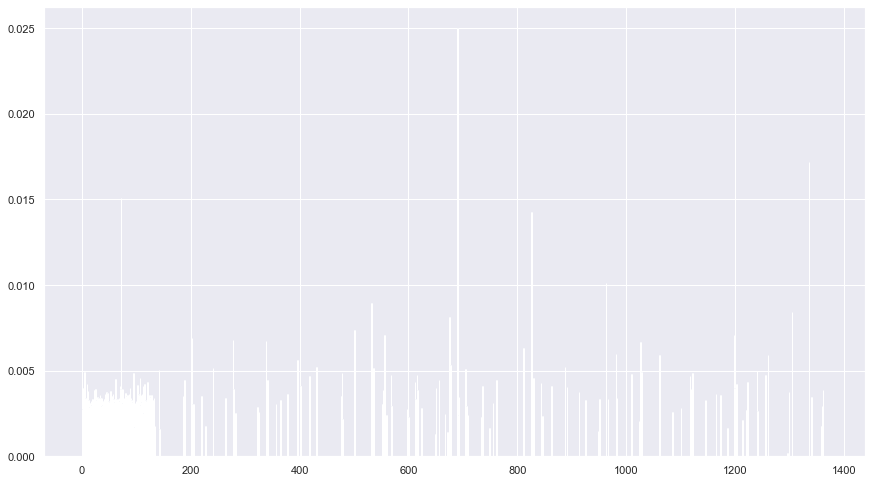

In [850]:

#print(bst.feature_importances_)
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()

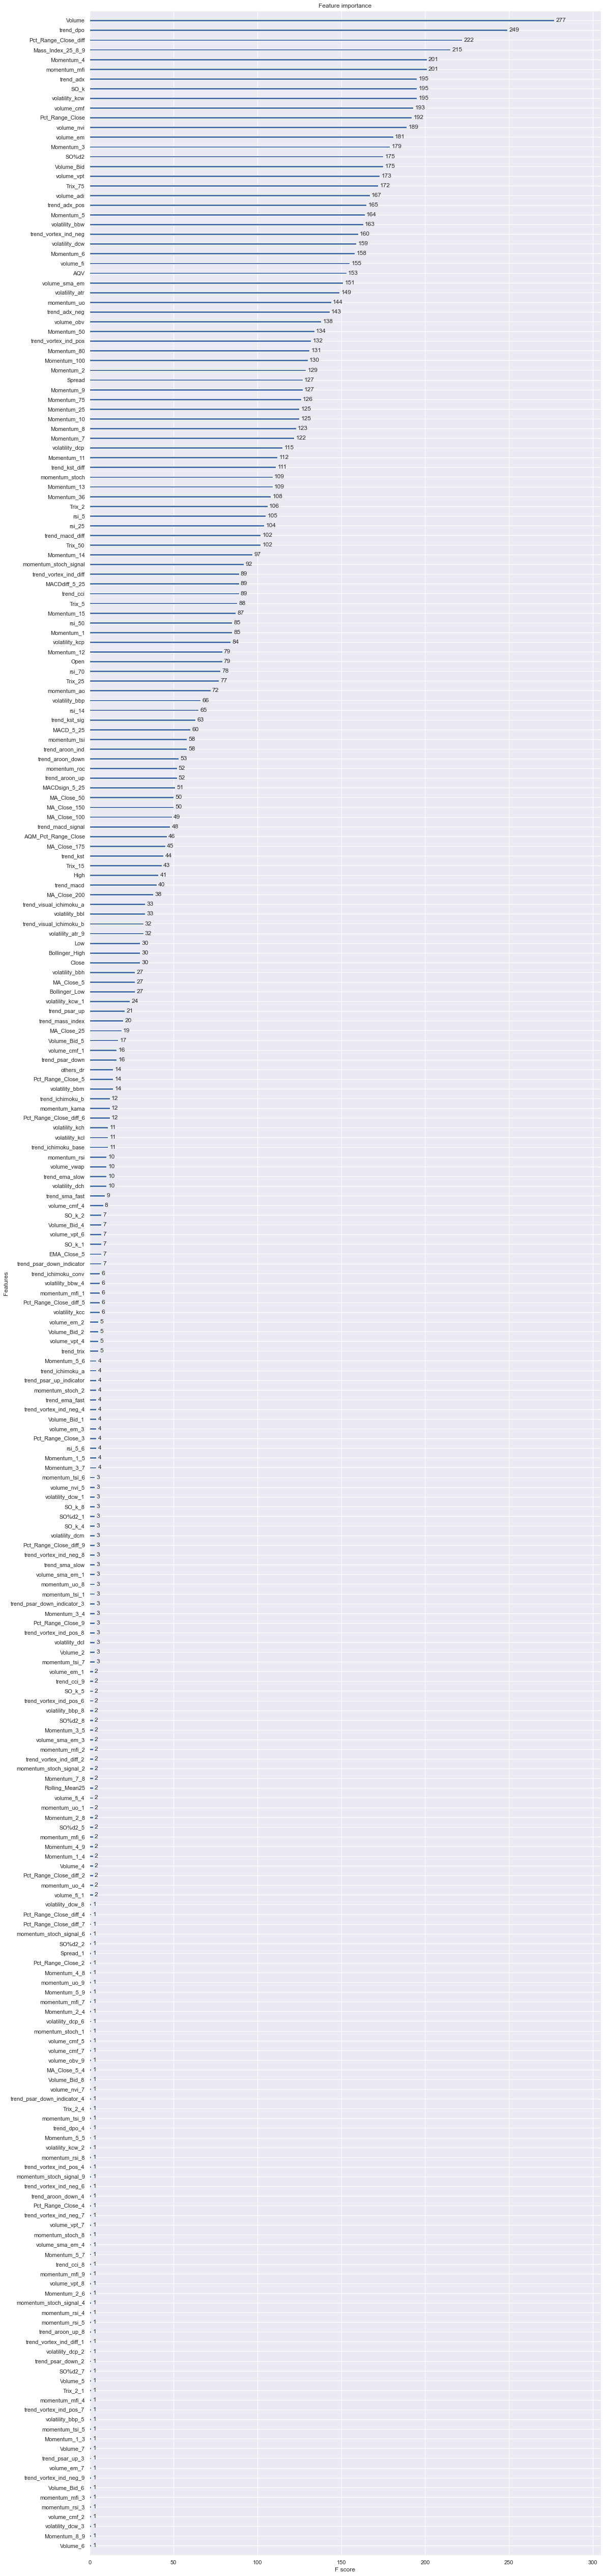

In [851]:
# plot feature importance
ax = plot_importance(bst)
fig = ax.figure
fig.set_size_inches(18, 92)
pyplot.show()

In [852]:
RUN_THRESHOLD = False

if (RUN_THRESHOLD):
    # define custom class to fix bug in xgboost 1.0.2
    class MyXGBClassifier(XGBClassifier):
        @property
        def coef_(self):
            return None

    # split data into X and y
    x,y = data,labels
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,shuffle=False)

    # fit model on all training data
    model = MyXGBClassifier()
    model.fit(X_train, y_train)
    # make predictions for test data and evaluate
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # Fit model using each importance as a threshold
    thresholds = sort(model.feature_importances_)
    for thresh in thresholds:
        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        # train model
        selection_model = XGBClassifier()
        selection_model.fit(select_X_train, y_train)
        # eval model
        select_X_test = selection.transform(X_test)
        predictions = selection_model.predict(select_X_test)
        accuracy = accuracy_score(y_test, predictions)
        print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [853]:
#GET ID
results_path_xgboost4h = os.path.join(pwd, r'../../../Results/XGBoost/4H/')
filenames_results = glob.glob(results_path_xgboost4h + "/*.csv")
newID = len(filenames_results) +1
newID

11

In [854]:
#LOCATION TO SAVE
pwd = os.getcwd()
source_data_toSave = os.path.join(pwd, r'../../../Models/2020/XGBoost/4H/')
#print('Location to Save: ', source_data)
FILENAME =  FILE_NAME_BASE +'_' + str(newID) 
#FILENAME = FILE_NAME_BASE + '__' + str(SIZE) + 'Size_' + MODEL_TYPE + '_' + str(PROFUNDIDAD) + 'Prof_' +  "{:.2f}".format(acc) + 'acc_' + TARGET_NAME + "_"+ ID 
file_name_toSave = FILENAME + '.bst'
print('FILENAME: ', FILENAME)
print('File Name Model:', file_name_toSave)

FILENAME:  3C-EURUSD_FULL_4H_145F_0.002Sep_11
File Name Model: 3C-EURUSD_FULL_4H_145F_0.002Sep_11.bst


In [855]:
train_dataset_results_csv = os.path.join(results_path_xgboost4h + FILENAME+ '_Train.csv')
print(train_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/4H/3C-EURUSD_FULL_4H_145F_0.002Sep_11_Train.csv


In [856]:
test_dataset_results_csv = os.path.join(results_path_xgboost4h + FILENAME+ '_Test.csv')
print(test_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/4H/3C-EURUSD_FULL_4H_145F_0.002Sep_11_Test.csv


In [857]:
rtest_dataset_results_csv = os.path.join(results_path_xgboost4h +FILENAME+ '_RealTest.csv')
print(rtest_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/4H/3C-EURUSD_FULL_4H_145F_0.002Sep_11_RealTest.csv


### Predict Train Dataset

In [858]:
y_train_pred = bst.predict(x_train)

In [859]:
y_train_real = pd.DataFrame({'Real_Class': y_train})
y_train_pred_pd = pd.DataFrame({'Predicted_Class': y_train_pred})
print('y_train_real ',y_train_real.shape)
print('y_train_pred_pd ',y_train_pred_pd.shape)
x_train_real = pd.concat([x_train,y_train_real], axis=1, sort=False)
print('x_train_real ',x_train_real.shape)
x_train = pd.concat([x_train_real,y_train_pred_pd], axis=1, sort=False)
print('x_train ', x_train.shape)

y_train_real  (15897, 1)
y_train_pred_pd  (15897, 1)
x_train_real  (15897, 1371)
x_train  (15897, 1372)


In [860]:
#Save
#x_train.to_csv(train_dataset_results_csv, header=True, index=False)
print(train_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/4H/3C-EURUSD_FULL_4H_145F_0.002Sep_11_Train.csv


### Predict REAL TEST Dataset

In [861]:
y_rtest_pred = bst.predict(x_rtest)
#x_train,x_test,y_train,y_test

In [862]:
y_rtest_real = pd.DataFrame({'Real_Class': y_rtest})
y_rtest_pred_pd = pd.DataFrame({'Predicted_Class': y_rtest_pred})
print('y_rtest_real ',y_rtest_real.shape)
print('y_rtest_pred_pd ',y_rtest_pred_pd.shape)
x_rtest_real = pd.concat([x_rtest,y_rtest_real], axis=1, sort=False)
print('x_rtest_real ',x_rtest_real.shape)
x_rtest = pd.concat([x_rtest_real,y_rtest_pred_pd], axis=1, sort=False)
print('x_rtest ', x_rtest.shape)

y_rtest_real  (5299, 1)
y_rtest_pred_pd  (5299, 1)
x_rtest_real  (5299, 1371)
x_rtest  (5299, 1372)


In [863]:
#Save
x_rtest.to_csv(rtest_dataset_results_csv, header=True, index=False)
print(rtest_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/4H/3C-EURUSD_FULL_4H_145F_0.002Sep_11_RealTest.csv


### Predict Test Dataset

In [864]:
x_test.shape
x_test

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo_9,momentum_stoch_9,momentum_stoch_signal_9,momentum_wr_9,momentum_ao_9,momentum_kama_9,momentum_roc_9,others_dr_9,others_dlr_9,others_cr_9
0,1.37704,1.37852,1.36964,1.37320,66221.1992,66473.7900,0.00003,-0.002818,-0.003602,1.678924e+09,...,43.698786,30.349531,35.581121,-69.650469,-0.003673,1.375349,-0.392424,-0.281756,-0.282153,9.097554
1,1.37319,1.37390,1.37192,1.37238,13075.3499,11326.8199,0.00003,-0.000597,0.002220,1.678938e+09,...,44.349899,23.358909,32.770350,-76.641091,-0.003801,1.375108,-0.467066,-0.059715,-0.059732,9.032407
2,1.37237,1.37389,1.37094,1.37095,22383.6401,20915.8999,0.00004,-0.001042,-0.000445,1.678960e+09,...,40.700663,11.167945,21.625462,-88.832055,-0.003993,1.374785,-0.500780,-0.104199,-0.104253,8.918797
3,1.37095,1.37128,1.36896,1.36995,28718.1098,25850.3798,0.00002,-0.000729,0.000313,1.678989e+09,...,41.175484,7.977438,14.168097,-92.022562,-0.004772,1.374135,-0.555314,-0.072942,-0.072969,8.839349
4,1.36995,1.37158,1.36323,1.36382,73086.5401,71007.1603,0.00001,-0.004475,-0.003745,1.679062e+09,...,33.143198,3.252481,7.465955,-96.747519,-0.006216,1.372267,-0.881573,-0.447462,-0.448466,8.352335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,1.06416,1.06471,1.05922,1.06044,55712.7685,54687.9913,0.00001,-0.003524,-0.003420,1.912903e+09,...,39.756175,11.764706,26.547633,-88.235294,-0.004760,1.063666,-0.505709,-0.352381,-0.353003,-15.750503
5294,1.06045,1.06093,1.05942,1.05991,37793.7207,36550.6201,0.00001,-0.000500,0.003024,1.912941e+09,...,40.629475,8.679245,17.947591,-91.320755,-0.004803,1.063409,-0.549837,-0.049979,-0.049992,-15.792610
5295,1.05991,1.06017,1.05930,1.05991,12969.0201,10546.7201,0.00004,0.000000,0.000500,1.912954e+09,...,39.386017,9.102902,9.848951,-90.897098,-0.004813,1.063172,-0.593675,0.000000,0.000000,-15.792610
5296,1.05990,1.06094,1.05915,1.06043,18791.3702,19262.1101,0.00003,0.000491,0.000491,1.912972e+09,...,44.787682,16.732026,11.504725,-83.267974,-0.005055,1.063092,-0.337400,0.049061,0.049049,-15.751297


In [865]:
y_test_pred = bst.predict(x_test)
#x_train,x_test,y_train,y_test

In [866]:
y_test_pred.shape

(5298,)

In [867]:
y_test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [868]:
y_test_real = pd.DataFrame({'Real_Class': y_test})
y_test_pred_pd = pd.DataFrame({'Predicted_Class': y_test_pred})
print('y_test_real ',y_test_real.shape)
print('y_test_pred_pd ',y_test_pred_pd.shape)
x_test_real = pd.concat([x_test,y_test_real], axis=1, sort=False)
print('x_test_real ',x_test_real.shape)
x_test = pd.concat([x_test_real,y_test_pred_pd], axis=1, sort=False)
print('x_test ', x_test.shape)

y_test_real  (5298, 1)
y_test_pred_pd  (5298, 1)
x_test_real  (5298, 1371)
x_test  (5298, 1372)


In [869]:

print(x_test['Predicted_Class'].isnull().sum())
#DATASET_FULL.fillna(method='backfill', inplace=True)

0


In [870]:
#Save
#x_test.to_csv(test_dataset_results_csv, header=True, index=False)
print(test_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/4H/3C-EURUSD_FULL_4H_145F_0.002Sep_11_Test.csv


### XGBoost Results CSV

In [871]:

#FILENAME = FILE_NAME_BASE + '__' + str(SIZE) + 'Size_' + MODEL_TYPE + '_' + str(PROFUNDIDAD) + 'Prof_' +  "{:.2f}".format(acc) + 'acc_' + TARGET_NAME + "_"+ ID 

data = {'Model_Name':[FILENAME], 'ACC':[acc], 'Profundidad':[PROFUNDIDAD], 'TEST_SIZE':[TEST_SIZE], 
        'VAL_SIZE':[VAL_SIZE], 'FILE_NAME_BASE':[FILE_NAME_BASE], 'DATA_SIZE':[SIZE], 'ID':[ID]}

Results = pd.DataFrame(data)
print(Results)

filename = 'XGBoost_Results.csv'
print(filename)
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Results/XGBoost/4H/' + filename)
print(filename_path)

                           Model_Name       ACC  Profundidad  TEST_SIZE  \
0  3C-EURUSD_FULL_4H_145F_0.002Sep_11  0.668365            9        0.2   

   VAL_SIZE                   FILE_NAME_BASE  DATA_SIZE  ID  
0       0.2  3C-EURUSD_FULL_4H_145F_0.002Sep      26494  01  
XGBoost_Results.csv
C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/4H/XGBoost_Results.csv


In [872]:
Results_loaded = pd.read_csv(filename_path, header=0)

In [873]:
Results_loaded = Results_loaded.append(Results,ignore_index=True)
print(Results_loaded[-1:])

                            Model_Name       ACC  Profundidad  TEST_SIZE  \
11  3C-EURUSD_FULL_4H_145F_0.002Sep_11  0.668365            9        0.2   

    VAL_SIZE                   FILE_NAME_BASE  DATA_SIZE  ID  
11       0.2  3C-EURUSD_FULL_4H_145F_0.002Sep      26494  01  


In [874]:
Results_loaded.to_csv(filename_path, header=True, index=False)

In [875]:
this_model = Results_loaded.loc[Results_loaded['FILE_NAME_BASE'] == FILE_NAME_BASE]
this_model

,Model_Name,ACC,Profundidad,TEST_SIZE,VAL_SIZE,FILE_NAME_BASE,DATA_SIZE,ID
0,3C-EURUSD_FULL_4H_145F_0.002Sep_1,0.696112,1,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1
1,3C-EURUSD_FULL_4H_145F_0.002Sep_2,0.696112,1,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1
2,3C-EURUSD_FULL_4H_145F_0.002Sep_2,0.747641,0,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1
3,3C-EURUSD_FULL_4H_145F_0.002Sep_3,0.696112,1,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1
4,3C-EURUSD_FULL_4H_145F_0.002Sep_4,0.651000,3,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1
5,3C-EURUSD_FULL_4H_145F_0.002Sep_5,0.724424,2,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1
6,3C-EURUSD_FULL_4H_145F_0.002Sep_6,0.671763,4,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1
7,3C-EURUSD_FULL_4H_145F_0.002Sep_7,0.683277,5,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1
8,3C-EURUSD_FULL_4H_145F_0.002Sep_8,0.721971,6,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1
9,3C-EURUSD_FULL_4H_145F_0.002Sep_9,0.739713,7,0.2,0.2,3C-EURUSD_FULL_4H_145F_0.002Sep,26494,1


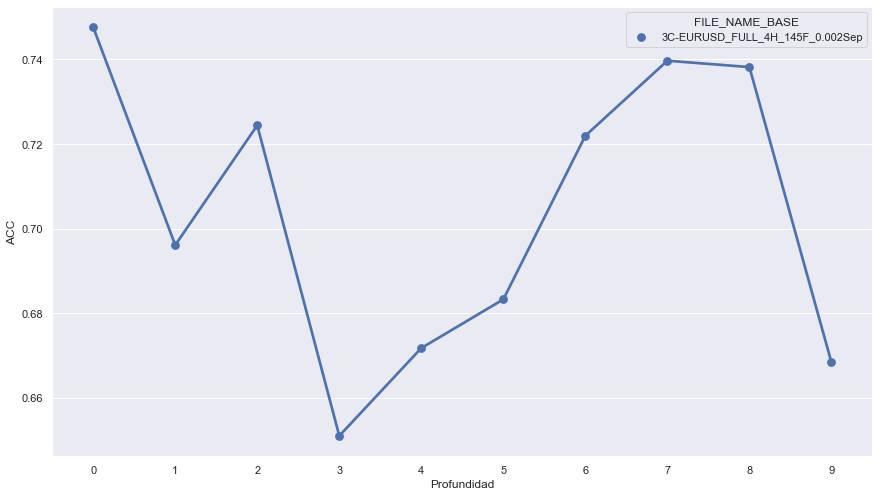

In [876]:
sns.pointplot(x="Profundidad", y="ACC", hue="FILE_NAME_BASE",  data=this_model)

In [877]:
Results_loaded
Only_high = Results_loaded.loc[Results_loaded['ACC'] > 0.49]
#Only_high


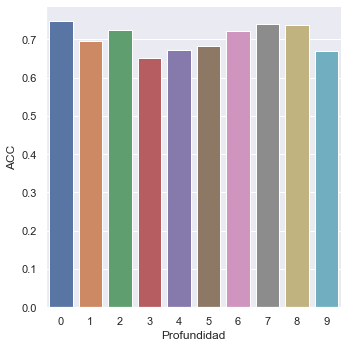

In [878]:
#print(subset_to_plot)
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.catplot(x="Profundidad", y="ACC",   data=Only_high, kind="bar");

In [879]:
acc

0.6683654209135523